<a href="https://colab.research.google.com/github/kamalahmadov474/Deep-Learning/blob/main/Emotion_Prediction_using_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [2]:
data = pd.read_csv("/content/tweet_emotions.csv")
data2 = pd.read_csv("/content/tweet_emotions.csv")

In [3]:
data.head(5)

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [4]:
data.drop(columns = ['tweet_id'] , inplace = True)
data.sample(2)

,sentiment,content
19326,fun,Fun Friday night planned...... Spent at work
3934,neutral,"trying to wake up, but is finding it very hard"


In [5]:
data["sentiment"].value_counts()

,count
sentiment,
neutral,8638
worry,8459
happiness,5209
sadness,5165
love,3842
surprise,2187
fun,1776
relief,1526
hate,1323


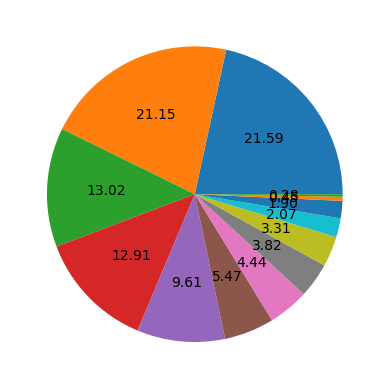

In [6]:
import matplotlib.pyplot as plt
plt.pie(data['sentiment'].value_counts(),autopct="%0.2f")
plt.show()

<Axes: ylabel='count'>

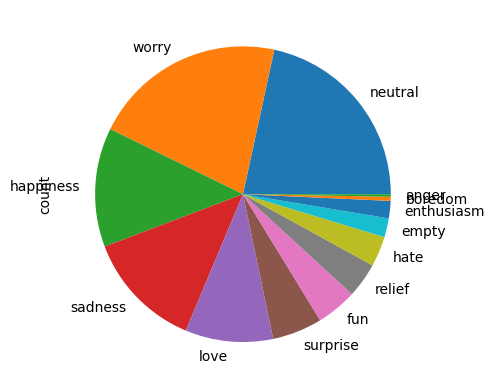

In [7]:
data["sentiment"].value_counts().plot(kind = 'pie')

In [8]:
data.replace({"sentiment":
             {"neutral":0,
             "worry":1,
             "happiness":2,
             "sadness":3,
             "love":4,
             "surprise":5,
             "fun":6,
             "relief":7,
             "hate":8,
             "empty":9,
             "enthusiasm":10,
             "boredom":11,
             "anger":12}
             }
            ,inplace = True)

/tmp/ipython-input-8-2147078934.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"sentiment":


In [9]:
data.sample(5)

,sentiment,content
29378,4,@ArthurFontes check out review for the movie F...
25527,0,@t_de_baillon
32637,9,@Den_Mom Maybe people would start looking for ...
27660,0,Building Websites
12707,5,@tommcfly talk to me isn't a good idea? i'm g...


In [18]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
import string
import re

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [20]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [21]:
data['content'] = data['content'].apply(transform_text)

In [22]:
data.sample(5)

,sentiment,content
39521,9,catwoman123 someth like
14807,1,last day dma million sad face
3367,1,go refus feel pain
3486,0,pickassoreborn thank go rain weekend
4122,8,never get invit go anywher


In [23]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [24]:
neutral = wc.generate(data[data['sentiment'] == 0]['content'].str.cat(sep=" "))

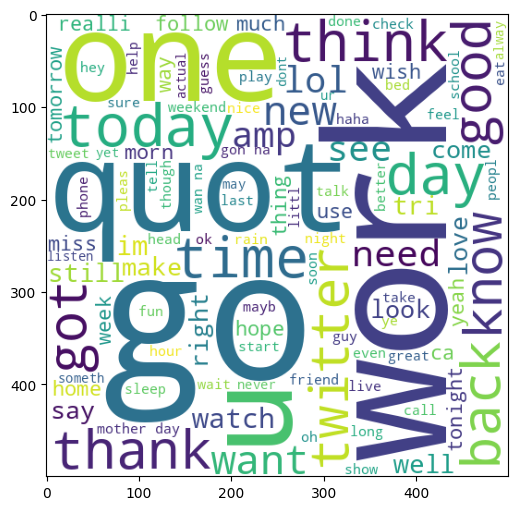

In [25]:
plt.figure(figsize=(10,6))
plt.imshow(neutral)

In [26]:
worry = wc.generate(data[data['sentiment'] == 1]['content'].str.cat(sep=" "))


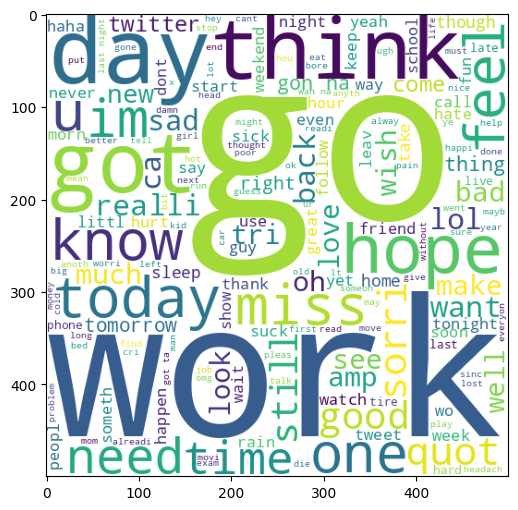

In [27]:
plt.figure(figsize=(10,6))
plt.imshow(worry)

In [28]:
happiness = wc.generate(data[data['sentiment'] == 2]['content'].str.cat(sep=" "))


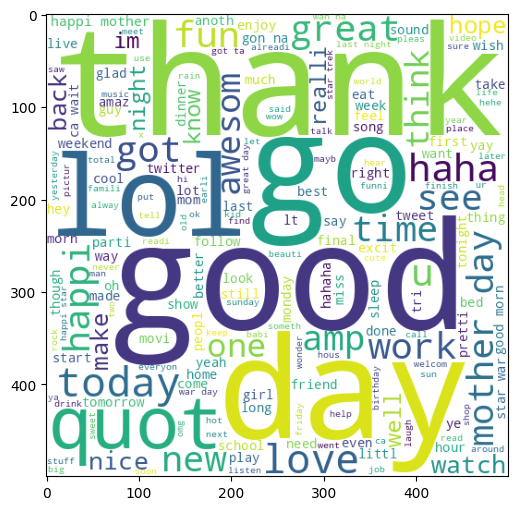

In [29]:
plt.figure(figsize=(10,6))
plt.imshow(happiness)

In [30]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [31]:
X = tfidf.fit_transform(data['content']).toarray()

In [32]:
y = data['sentiment']

In [33]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2,random_state = 2)

In [34]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(32000, 3000)
(32000,)
(8000, 3000)
(8000,)


In [35]:
y_train

,sentiment
31392,1
6949,7
8340,3
21593,4
13988,0
...,...
31019,1
30280,2
6637,4
35343,4


In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)
print("Train acc:", model.score(X_train, y_train))
print("Test acc:", model.score(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train acc: 0.44325
Test acc: 0.3455


In [39]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [40]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [41]:
# Fit models
gnb.fit(X_train, y_train)
mnb.fit(X_train, y_train)
bnb.fit(X_train, y_train)

# Make predictions
y_pred1 = gnb.predict(X_test)

# Print accuracies
print("Train acc (MultinomialNB):", gnb.score(X_train, y_train))
print("Test acc (MultinomialNB):", gnb.score(X_test, y_test))

Train acc (MultinomialNB): 0.14640625
Test acc (MultinomialNB): 0.05275


In [42]:
# Make predictions
y_pred1 = mnb.predict(X_test)

# Print accuracies
print("Train acc (MultinomialNB):", mnb.score(X_train, y_train))
print("Test acc (MultinomialNB):", mnb.score(X_test, y_test))

Train acc (MultinomialNB): 0.39971875
Test acc (MultinomialNB): 0.32175


In [43]:
# Make predictions
y_pred1 = bnb.predict(X_test)

# Print accuracies
print("Train acc (MultinomialNB):", bnb.score(X_train, y_train))
print("Test acc (MultinomialNB):", bnb.score(X_test, y_test))

Train acc (MultinomialNB): 0.44028125
Test acc (MultinomialNB): 0.33475
